# Chronic Liver Disease 

The dataset can be found [here](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records).

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

The dataset contains the following features:
1. Age of the patient
2. Gender of the patient
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase
7. Aspartate Aminotransferase
8. Total Protiens
9. Albumin
10. Albumin and Globulin Ratio
11. Dataset: Target - Patient with liver disease, or no disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Chronic Liver Disease/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


There are 4 missing values in Albumin_and_Globulin_ratio column.

In [4]:
data['Albumin_and_Globulin_Ratio'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68,  nan, 1.9 , 1.7 , 1.8 , 0.3 , 0.97,
       0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46,
       0.39, 1.02, 2.5 , 0.37])

We can fill the missing values with its mean:

In [5]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

We rename the column 'Dataset' to 'Target' to reflect its true meaning:

In [6]:
data.rename(columns = {'Dataset':'Target'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
for x in data.columns:
  print('Unique values for column "{}": \n'.format(x), data[x].unique())

Unique values for column "Age": 
 [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
Unique values for column "Gender": 
 ['Female' 'Male']
Unique values for column "Total_Bilirubin": 
 [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]
Unique values for column "Direct_Bilirubin": 
 [ 0.1  5.5  4.1  0.4  2.  

There does not seem to be any mismatches or errors. Encode the categorical variable Gender:

In [8]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
data['Gender'] = Encoder.fit_transform(data['Gender'])
data['Gender'].unique()

array([0, 1])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


We check the correlation:

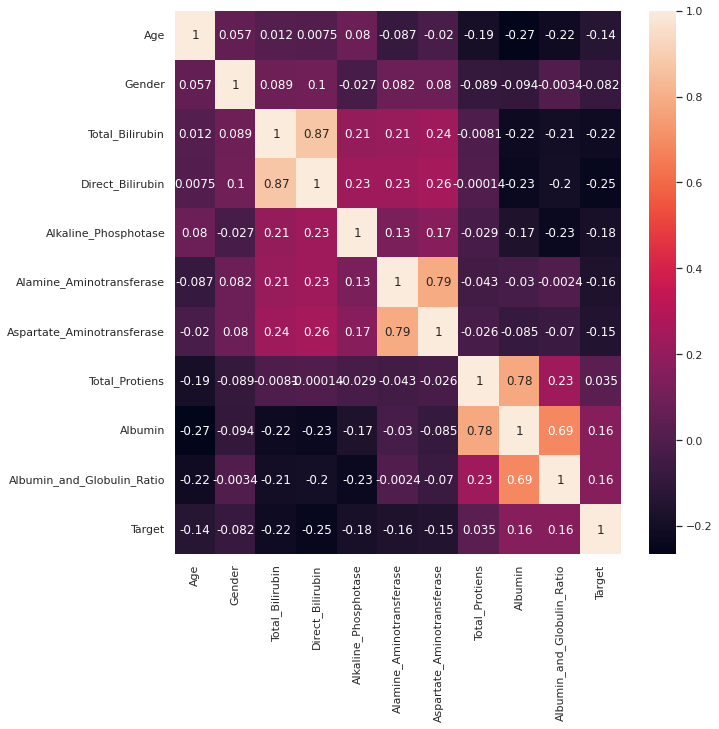

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

There is no noteworthy correlation.

Now we check the Target class:

In [11]:
data['Target'].replace({1:1, 2:0}, inplace = True)

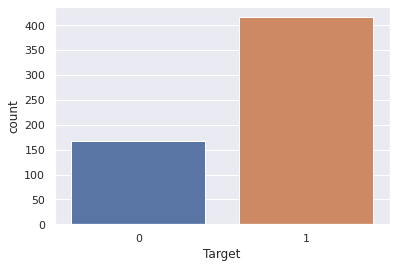

In [12]:
sns.countplot(x = data['Target'])

Clearly, there is target imbalance.

## Split the Features and Targets

In [13]:
x_data = data.drop('Target', axis = 1)
print('Shape of Features: ', x_data.shape)
y_data = data['Target']
print('Shape of the target: ', y_data.shape)

Shape of Features:  (583, 10)
Shape of the target:  (583,)


## Standardization

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x_data)
x_scaled = scaler.transform(x_data)

In [15]:
scaled_data = pd.DataFrame(x_scaled, columns = x_data.columns)
scaled_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.80,-1.0,-0.166667,-0.181818,-0.171429,-0.506667,-0.387097,0.142857,0.166667,-0.11766
1,0.68,0.0,5.500000,4.727273,4.008163,0.773333,0.935484,0.642857,0.083333,-0.51766
2,0.68,0.0,3.500000,3.454545,2.302041,0.666667,0.419355,0.285714,0.166667,-0.14266
3,0.52,0.0,0.000000,0.090909,-0.212245,-0.560000,-0.354839,0.142857,0.250000,0.13234
4,1.08,0.0,1.611111,1.545455,-0.106122,-0.213333,0.274194,0.500000,-0.583333,-1.36766


## Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

#### Scree Plot

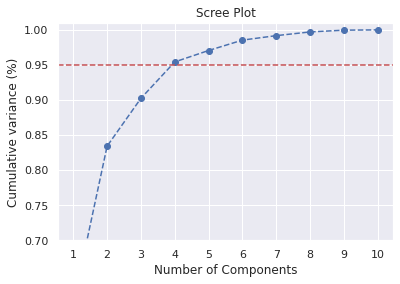

In [17]:
fig, ax = plt.subplots()
xi = np.arange(1, len(scaled_data.columns)+1, 1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
ax.set_ylim([0.70, 1.01])
plt.axhline(y = 0.95, color='r', linestyle='--')
ax.grid("both")
plt.show()

We note that with just 4 components, we can explain over 95% of the variance in our dataset.

In [18]:
pca = PCA(n_components = 0.95, random_state = 42)
pca.fit(scaled_data)
x_PCA = pca.transform(scaled_data)
print('Shape of x before PCA: ', scaled_data.shape)
print('Shape of x after PCA: ', x_PCA.shape)

Shape of x before PCA:  (583, 10)
Shape of x after PCA:  (583, 4)


In [19]:
columns = ['PCA Compponent 0%i' %i for i in range(1, (x_PCA.shape)[1]+1)]
PCA_data  = pd.DataFrame(pca.transform(x_data), columns = columns)
PCA_data.head()

,PCA Compponent 01,PCA Compponent 02,PCA Compponent 03,PCA Compponent 04
0,32.217190,13.556513,46.433048,178.613546
1,154.355220,56.373651,186.457792,658.217801
2,116.608301,36.121898,119.837748,464.227528
3,31.995473,13.486971,47.732925,172.901357
4,68.559186,9.274848,69.849482,179.670704


In [20]:
PCA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PCA Compponent 01  583 non-null    float64
 1   PCA Compponent 02  583 non-null    float64
 2   PCA Compponent 03  583 non-null    float64
 3   PCA Compponent 04  583 non-null    float64
dtypes: float64(4)
memory usage: 18.3 KB


In [21]:
x = PCA_data.values
y = y_data.values

## Split into Test and Train sets

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print('Shape x_train: ', x_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (408, 4)
Shape y_train:  (408,)
Shape x_test:  (175, 4)
Shape y_test:  (175,)


## ML Techniques - Imbalanced Dataset

We do not perform Pre-pruning or post-pruning on the Imbalanced data; we would like to know how the performance changes in general.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

### k-Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors = 11)
kNN_classifier.fit(x_train, y_train)
y_pred_kNN = kNN_classifier.predict(x_test)
kNN_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [25]:
y_pred_kNN_train = kNN_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the train set:  0.7352941176470589
Accuracy of the test set:  0.6914285714285714


In [26]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.41      0.36      0.39        47
           1       0.78      0.81      0.79       128

    accuracy                           0.69       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.68      0.69      0.68       175



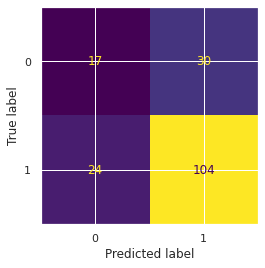

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar = False)

### Naive Bayes

In [28]:
from sklearn.naive_bayes import BernoulliNB
NB_classifier = BernoulliNB()
NB_classifier.fit(x_train, y_train)
y_pred_NB = NB_classifier.predict(x_test)
NB_classifier.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [29]:
y_pred_NB_train = NB_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_NB_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_NB))

Accuracy of the train set:  0.7058823529411765
Accuracy of the test set:  0.7314285714285714


In [30]:
print(classification_report(y_test, y_pred_NB, labels = np.unique(y_pred_NB)))

              precision    recall  f1-score   support

           1       0.73      1.00      0.84       128

   micro avg       0.73      1.00      0.84       128
   macro avg       0.73      1.00      0.84       128
weighted avg       0.73      1.00      0.84       128



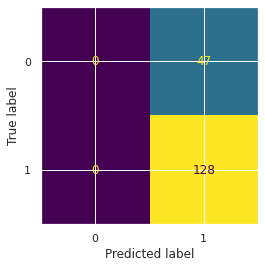

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NB, colorbar = False)

Naive Bayes probably finds the test data too easy. We have to be cautious.

### Support Vector Machine

In [32]:
from sklearn.svm import SVC
SVM_classifier = SVC(random_state = 42)
SVM_classifier.fit(x_train, y_train)
y_pred_SVM = SVM_classifier.predict(x_test)
SVM_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
y_pred_SVM_train = SVM_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_SVM_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_SVM))

Accuracy of the train set:  0.7058823529411765
Accuracy of the test set:  0.7314285714285714


In [34]:
print(classification_report(y_test, y_pred_SVM, labels = np.unique(y_pred_NB)))

              precision    recall  f1-score   support

           1       0.73      1.00      0.84       128

   micro avg       0.73      1.00      0.84       128
   macro avg       0.73      1.00      0.84       128
weighted avg       0.73      1.00      0.84       128



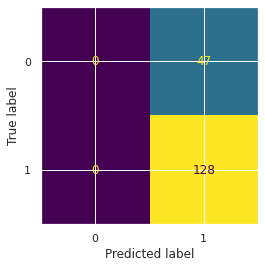

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM, colorbar = False)

The test accuracy is higher than the training accuracy by the same numbers; what are the odds?

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train)
y_pred_LR = LR_classifier.predict(x_test)
LR_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
y_pred_LR_train = LR_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_LR_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_LR))

Accuracy of the train set:  0.7034313725490197
Accuracy of the test set:  0.7257142857142858


In [38]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.73      0.99      0.84       128

    accuracy                           0.73       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.53      0.73      0.62       175



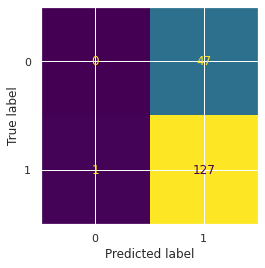

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR, colorbar = False)

### Decision Tree 

In [40]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(random_state = 42, max_depth = 3) 
DT_classifier.fit(x_train, y_train)
y_pred_DT = DT_classifier.predict(x_test)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [41]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the train set:  0.7401960784313726
Accuracy of the test set:  0.6971428571428572


The overfitting has been prevented to an extent using the hyperparameters max_depth. For further pruning of Decision Trees, one can use GridSearchCV.

              precision    recall  f1-score   support

           0       0.42      0.34      0.38        47
           1       0.77      0.83      0.80       128

    accuracy                           0.70       175
   macro avg       0.60      0.58      0.59       175
weighted avg       0.68      0.70      0.69       175



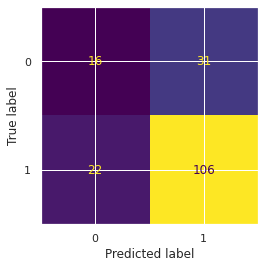

In [42]:
print(classification_report(y_test, y_pred_DT))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT, colorbar=False)

### Random Forests

In [43]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state=42, max_depth = 3)
RF_classifier.fit(x_train, y_train)
y_pred_RF = RF_classifier.predict(x_test)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [44]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the train set:  0.7696078431372549
Accuracy of the test set:  0.72


The overfitting here has been prevented to an extent using the Hyperparameter max_depth.

              precision    recall  f1-score   support

           0       0.47      0.32      0.38        47
           1       0.78      0.87      0.82       128

    accuracy                           0.72       175
   macro avg       0.62      0.59      0.60       175
weighted avg       0.69      0.72      0.70       175



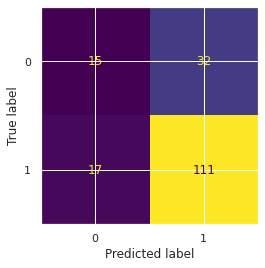

In [45]:
print(classification_report(y_test, y_pred_RF))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, colorbar=False)

### Accuracy

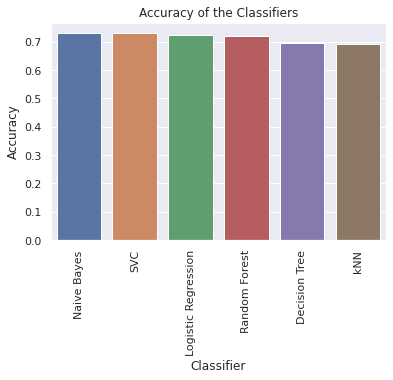

In [46]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest']
accuracy_df['Accuracy'] = [accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_kNN), accuracy_score(y_test, y_pred_NB), 
                           accuracy_score(y_test, y_pred_SVM), accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_RF)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

We see that SVC, Naive Bayes and Random Forest Classifier performs the best amongst the algorithms that we have implemented on the dataset with imbalanced target class.

### ROC Curve

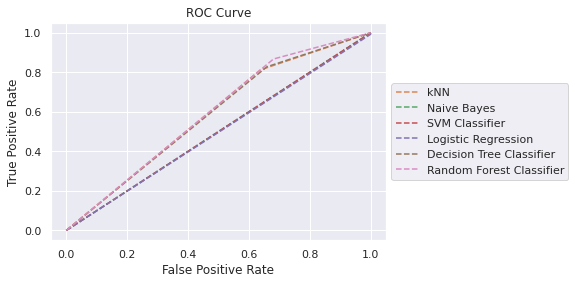

In [47]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_NB)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_LR)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

Random Forest Classifier has a better ROC Curve compared to the rest of the algorithms we have implemented. But it still is not appreciable. We therefore balance the target class, since in healthcare, we care not just about the accuracy but also about Precision, Recall and F1 score.

### Precision-Recall Curve

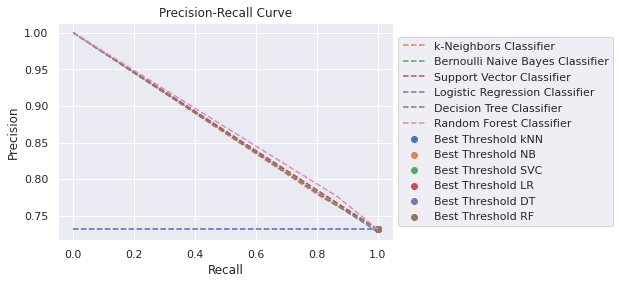

In [48]:
from sklearn.metrics import precision_recall_curve

no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_pred_kNN)
plt.plot(recall1, precision1, '--', label='k-Neighbors Classifier')
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_pred_NB)
plt.plot(recall2, precision2, '--', label='Bernoulli Naive Bayes Classifier')
precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_pred_SVM)
plt.plot(recall3, precision3, '--', label='Support Vector Classifier')
precision4, recall4, thresholds4 = precision_recall_curve(y_test, y_pred_LR)
plt.plot(recall4, precision4, '--', label='Logistic Regression Classifier')
precision5, recall5, thresholds5 = precision_recall_curve(y_test, y_pred_DT)
plt.plot(recall5, precision5, '--', label='Decision Tree Classifier')
precision6, recall6, thresholds6 = precision_recall_curve(y_test, y_pred_RF)
plt.plot(recall6, precision6, '--', label='Random Forest Classifier')

fscore1 = (2 * precision1 * recall1) / (precision1 + recall1)
fscore2 = (2 * precision2 * recall2) / (precision2 + recall2)
fscore3 = (2 * precision3 * recall3) / (precision3 + recall3)
fscore4 = (2 * precision4 * recall4) / (precision4 + recall4)
fscore5 = (2 * precision5 * recall5) / (precision5 + recall5)
fscore6 = (2 * precision6 * recall6) / (precision6 + recall6)

ix1 = np.argmax(fscore1)
ix2 = np.argmax(fscore2)
ix3 = np.argmax(fscore3)
ix4 = np.argmax(fscore4)
ix5 = np.argmax(fscore5)
ix6 = np.argmax(fscore6)

plt.scatter(recall1[ix1], precision1[ix1], marker='o', label='Best Threshold kNN')
plt.scatter(recall2[ix2], precision2[ix2], marker='o', label='Best Threshold NB')
plt.scatter(recall3[ix3], precision3[ix3], marker='o', label='Best Threshold SVC')
plt.scatter(recall4[ix4], precision4[ix4], marker='o', label='Best Threshold LR')
plt.scatter(recall5[ix5], precision5[ix5], marker='o', label='Best Threshold DT')
plt.scatter(recall6[ix6], precision6[ix6], marker='o', label='Best Threshold RF')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

The No-skill line, depicted by the horizontal blue line, represents the scenario where the classifier cannot differentiate between the classes and predicts at random. We can see from the Precision-Recall Curve that our models are neither good nor bad - The random Forest Classifier performs a little better than the other models but it is still not appreciably good enough.

The Best Thresholds however are at Recall = 1, which yields a corresponding Precision of about 70%.


## Handling Target Imbalance

### Data Oversampling

In [49]:
from imblearn.over_sampling import ADASYN
from collections import Counter
oversample = ADASYN()
X_data,Y_data = oversample.fit_resample(x_data, y_data)
Counter(Y_data)

Counter({1: 416, 0: 374})

In [50]:
Data = pd.DataFrame(X_data, columns = x_data.columns)
Data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [51]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         790 non-null    int64  
 1   Gender                      790 non-null    int64  
 2   Total_Bilirubin             790 non-null    float64
 3   Direct_Bilirubin            790 non-null    float64
 4   Alkaline_Phosphotase        790 non-null    int64  
 5   Alamine_Aminotransferase    790 non-null    int64  
 6   Aspartate_Aminotransferase  790 non-null    int64  
 7   Total_Protiens              790 non-null    float64
 8   Albumin                     790 non-null    float64
 9   Albumin_and_Globulin_Ratio  790 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 61.8 KB


### Standardization

In [52]:
scaler_balanced = RobustScaler()
scaler_balanced.fit(X_data)
X_scaled = scaler_balanced.transform(X_data)

In [53]:
Scaled_Data = pd.DataFrame(X_scaled, columns = X_data.columns)
Scaled_Data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.80,-1.0,-0.206210,-0.285714,-0.124464,-0.484848,-0.408163,0.148860,0.090909,-0.326143
1,0.68,0.0,8.865136,7.428571,4.270386,0.969697,1.265306,0.661042,0.000000,-0.849242
2,0.68,0.0,5.663485,5.428571,2.476395,0.848485,0.612245,0.295198,0.090909,-0.358836
3,0.52,0.0,0.060595,0.142857,-0.167382,-0.545455,-0.367347,0.148860,0.181818,0.000794
4,1.08,0.0,2.639703,2.428571,-0.055794,-0.151515,0.428571,0.514704,-0.727273,-1.960828


In [54]:
Scaled_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         790 non-null    float64
 1   Gender                      790 non-null    float64
 2   Total_Bilirubin             790 non-null    float64
 3   Direct_Bilirubin            790 non-null    float64
 4   Alkaline_Phosphotase        790 non-null    float64
 5   Alamine_Aminotransferase    790 non-null    float64
 6   Aspartate_Aminotransferase  790 non-null    float64
 7   Total_Protiens              790 non-null    float64
 8   Albumin                     790 non-null    float64
 9   Albumin_and_Globulin_Ratio  790 non-null    float64
dtypes: float64(10)
memory usage: 61.8 KB


### Principal Component Analysis
Do the PCA on the balanced data:

In [55]:
pca_balanced = PCA()
pca_balanced.fit(Scaled_Data)
pca_balanced.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

#### Scree Plot

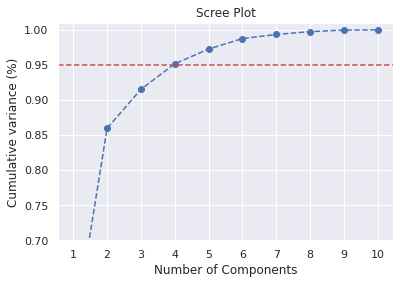

In [56]:
fig, ax = plt.subplots()
xi = np.arange(1, len(Scaled_Data.columns)+1, 1)
yi = np.cumsum(pca_balanced.explained_variance_ratio_)

plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
ax.set_ylim([0.70, 1.01])
plt.axhline(y = 0.95, color='r', linestyle='--')
ax.grid("both")
plt.show()

In [57]:
pca_balanced = PCA(n_components=0.96, random_state = 42)
pca_balanced.fit(Scaled_Data)
X_PCA = pca_balanced.transform(Scaled_Data)
print('Shape of X before PCA: ', Scaled_Data.shape)
print('Shape of X after PCA: ', X_PCA.shape)

Shape of X before PCA:  (790, 10)
Shape of X after PCA:  (790, 5)


In [58]:
columns_PCA = ['PCA Compponent 0%i' %i for i in range(1, (X_PCA.shape)[1]+1, 1)]
PCA_Data = pd.DataFrame(pca_balanced.transform(X_data), columns = columns_PCA)
PCA_Data.head()

,PCA Compponent 01,PCA Compponent 02,PCA Compponent 03,PCA Compponent 04,PCA Compponent 05
0,30.758509,-4.173358,25.828869,179.043374,24.453012
1,150.231536,-19.823665,109.911719,663.337876,90.730486
2,111.766631,-19.062536,65.189691,466.626122,63.560558
3,30.763720,-4.119911,27.753658,173.615831,23.632388
4,65.105450,-20.351340,46.544747,182.665376,25.983369


In [59]:
X = PCA_Data.values
Y = Y_data.values

### Split into Train and Test sets

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.3)
print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', Y_train.shape)
print('y_test shape: ', Y_test.shape)

x_train shape:  (553, 5)
x_test shape:  (237, 5)
y_train shape:  (553,)
y_test shape:  (237,)


## ML Techniques - Balanced Target class

### k-Neighbours Classifier

We can quickly tweak the n_neighbors to prevent overfitting.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier_balanced = KNeighborsClassifier(n_neighbors=3)
kNN_classifier_balanced.fit(X_train, Y_train)
kNN_classifier_balanced.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [62]:
y_pred_kNN_balanced = kNN_classifier_balanced.predict(X_test)
y_pred_kNN_train_balanced = kNN_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_kNN_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_kNN_balanced))

Accuracy of the training set:  0.8517179023508138
Accuracy of the testing set:  0.6666666666666666


              precision    recall  f1-score   support

           0       0.62      0.75      0.68       113
           1       0.72      0.59      0.65       124

    accuracy                           0.67       237
   macro avg       0.67      0.67      0.67       237
weighted avg       0.68      0.67      0.67       237



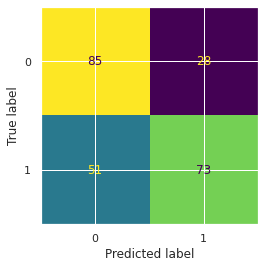

In [63]:
print(classification_report(Y_test, y_pred_kNN_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_kNN_balanced, colorbar=False)

### Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
NB_classifier_balanced = GaussianNB()
NB_classifier_balanced.fit(X_train, Y_train)
NB_classifier_balanced.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [65]:
y_pred_NB_balanced = NB_classifier_balanced.predict(X_test)
y_pred_NB_train_balanced = NB_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_NB_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_NB_balanced))

Accuracy of the training set:  0.6419529837251357
Accuracy of the testing set:  0.5949367088607594


              precision    recall  f1-score   support

           0       0.54      0.94      0.69       113
           1       0.83      0.28      0.42       124

    accuracy                           0.59       237
   macro avg       0.69      0.61      0.55       237
weighted avg       0.70      0.59      0.55       237



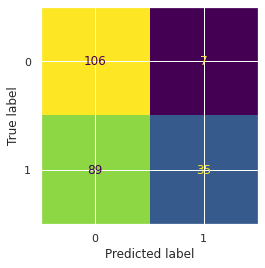

In [66]:
print(classification_report(Y_test, y_pred_NB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_NB_balanced, colorbar=False)

### Support Vector Machine

In [67]:
SVM_classifier_balanced = SVC(random_state = 42)
SVM_classifier_balanced.fit(X_train, Y_train)
y_pred_SVM_balanced = SVM_classifier_balanced.predict(X_test)

In [68]:
y_pred_SVM_train_balanced = SVM_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_SVM_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_SVM_balanced))

Accuracy of the training set:  0.6473779385171791
Accuracy of the testing set:  0.620253164556962


In [69]:
print(classification_report(Y_test, y_pred_SVM_balanced))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       113
           1       0.72      0.44      0.55       124

    accuracy                           0.62       237
   macro avg       0.65      0.63      0.61       237
weighted avg       0.65      0.62      0.61       237



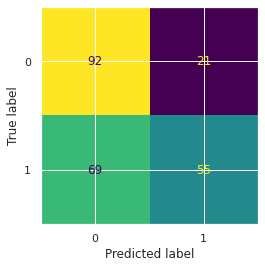

In [70]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_SVM_balanced, colorbar=False)

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
LR_classifier_balanced = LogisticRegression(random_state = 42)
LR_classifier_balanced.fit(X_train, Y_train)
LR_classifier_balanced.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [72]:
y_pred_LR_balanced = LR_classifier_balanced.predict(X_test)
y_pred_LR_train_balanced = LR_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_LR_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_LR_balanced))

Accuracy of the training set:  0.6871609403254972
Accuracy of the testing set:  0.679324894514768


In [73]:
print(classification_report(Y_test, y_pred_LR_balanced))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       113
           1       0.77      0.56      0.64       124

    accuracy                           0.68       237
   macro avg       0.70      0.69      0.68       237
weighted avg       0.70      0.68      0.67       237



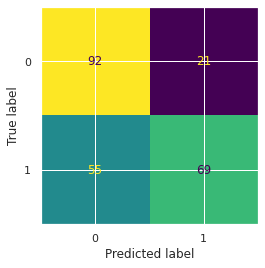

In [74]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_LR_balanced, colorbar=False)

### Decision Tree Classifier

We limit the *max_depth* since this is a small dataset, in order to avoid overfitting.

In [75]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_balanced = DecisionTreeClassifier(max_depth = 8, min_samples_split = 7)
DT_classifier_balanced.fit(X_train, Y_train)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [76]:
y_pred_DT_balanced = DT_classifier_balanced.predict(X_test)
y_pred_DT_train_balanced = DT_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_DT_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_DT_balanced))

Accuracy of the training set:  0.8716094032549728
Accuracy of the testing set:  0.70042194092827


              precision    recall  f1-score   support

           0       0.65      0.82      0.72       113
           1       0.78      0.59      0.67       124

    accuracy                           0.70       237
   macro avg       0.72      0.71      0.70       237
weighted avg       0.72      0.70      0.70       237



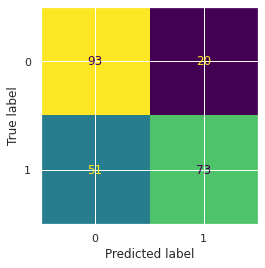

In [77]:
print(classification_report(Y_test, y_pred_DT_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_DT_balanced, colorbar=False)

### Random Forest Classifier

We limit the max_depth since this is a small dataset, in order to control overfitting - we still need to fine-tune the hyperparameters in order to prevent overfitting.

In [78]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier_balanced = RandomForestClassifier(n_estimators = 50, max_depth = 8)
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
y_pred_RF_balanced = RF_classifier_balanced.predict(X_test)
y_pred_RF_train_balanced = RF_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_RF_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_RF_balanced))

Accuracy of the training set:  0.9132007233273056
Accuracy of the testing set:  0.7088607594936709


              precision    recall  f1-score   support

           0       0.66      0.80      0.72       113
           1       0.77      0.63      0.69       124

    accuracy                           0.71       237
   macro avg       0.72      0.71      0.71       237
weighted avg       0.72      0.71      0.71       237



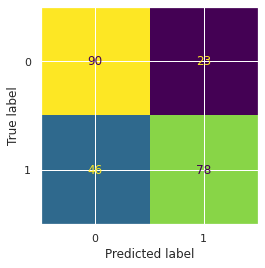

In [80]:
print(classification_report(Y_test, y_pred_RF_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_RF_balanced, colorbar=False)

### AdaBoost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_balanced = AdaBoostClassifier(learning_rate=0.05, base_estimator = RandomForestClassifier(max_depth = 8))
adaboost_balanced.fit(X_train, Y_train)
adaboost_balanced.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 8,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(max_depth=8),
 'learning_rate': 0.05,
 'n_estimators': 50,
 'random_state': None}

In [82]:
y_pred_Adaboost_balanced = adaboost_balanced.predict(X_test)
print('Accuracy of the training set: ', adaboost_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_Adaboost_balanced))

Accuracy of the training set:  0.9891500904159132
Accuracy of the testing set:  0.6962025316455697


              precision    recall  f1-score   support

           0       0.66      0.74      0.70       113
           1       0.74      0.65      0.69       124

    accuracy                           0.70       237
   macro avg       0.70      0.70      0.70       237
weighted avg       0.70      0.70      0.70       237



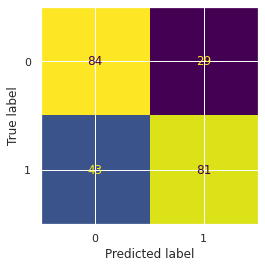

In [83]:
print(classification_report(Y_test, y_pred_Adaboost_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_Adaboost_balanced, colorbar=False)

### XGBoost Classifier

We limit the n_estimators and the learning_rate.

In [84]:
from xgboost import XGBClassifier
xgb_classifier_balanced = XGBClassifier(random_state = 42)
xgb_classifier_balanced.fit(X_train, Y_train)
xgb_classifier_balanced.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [85]:
y_pred_XGB_balanced = xgb_classifier_balanced.predict(X_test)
print('Accuracy of the training set: ', xgb_classifier_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_XGB_balanced))

Accuracy of the training set:  0.8933092224231465
Accuracy of the testing set:  0.6624472573839663


              precision    recall  f1-score   support

           0       0.63      0.69      0.66       113
           1       0.69      0.64      0.66       124

    accuracy                           0.66       237
   macro avg       0.66      0.66      0.66       237
weighted avg       0.66      0.66      0.66       237



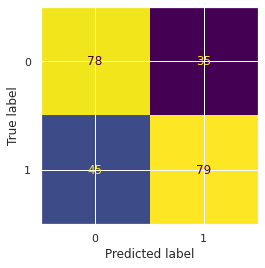

In [86]:
print(classification_report(Y_test, y_pred_XGB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_XGB_balanced, colorbar=False)

### Voting Classifier

In [87]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators = [('kNN', kNN_classifier_balanced), ('NB', NB_classifier_balanced), ('SVM', SVM_classifier_balanced),
                                    ('LR', LR_classifier_balanced), ('DT', DT_classifier_balanced), ('RF', RF_classifier_balanced), 
                                    ('Adaboost', adaboost_balanced), ('XGB', xgb_classifier_balanced)], voting = 'hard')
VC.fit(X_train, Y_train)
VC.get_params()

{'estimators': [('kNN', KNeighborsClassifier(n_neighbors=3)),
  ('NB', GaussianNB()),
  ('SVM', SVC(random_state=42)),
  ('LR', LogisticRegression(random_state=42)),
  ('DT', DecisionTreeClassifier(max_depth=8, min_samples_split=7)),
  ('RF', RandomForestClassifier(max_depth=8, n_estimators=50)),
  ('Adaboost',
   AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8),
                      learning_rate=0.05)),
  ('XGB', XGBClassifier(random_state=42))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'kNN': KNeighborsClassifier(n_neighbors=3),
 'NB': GaussianNB(),
 'SVM': SVC(random_state=42),
 'LR': LogisticRegression(random_state=42),
 'DT': DecisionTreeClassifier(max_depth=8, min_samples_split=7),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=50),
 'Adaboost': AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8),
                    learning_rate=0.05),
 'XGB': XGBClassifier(random_stat

In [88]:
y_pred_VC_balanced = VC.predict(X_test)
print('Accuracy of the training set: ', VC.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_VC_balanced))

Accuracy of the training set:  0.8462929475587704
Accuracy of the testing set:  0.6919831223628692


              precision    recall  f1-score   support

           0       0.62      0.89      0.73       113
           1       0.84      0.51      0.63       124

    accuracy                           0.69       237
   macro avg       0.73      0.70      0.68       237
weighted avg       0.74      0.69      0.68       237



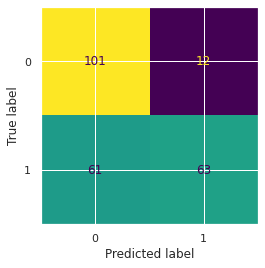

In [89]:
print(classification_report(Y_test, y_pred_VC_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_VC_balanced, colorbar=False)

### Accuracy

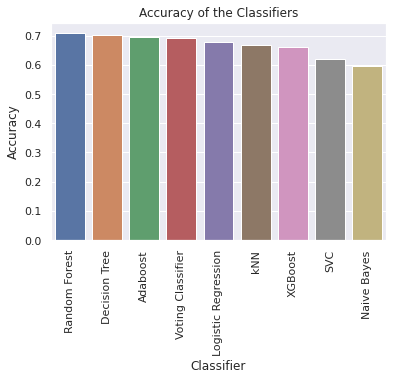

In [90]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest', 'Adaboost', 
                             'XGBoost', 'Voting Classifier']
accuracy_df['Accuracy'] = [accuracy_score(Y_test, y_pred_DT_balanced), accuracy_score(Y_test, y_pred_kNN_balanced), 
                           accuracy_score(Y_test, y_pred_NB_balanced), accuracy_score(Y_test, y_pred_SVM_balanced), 
                           accuracy_score(Y_test, y_pred_LR_balanced), accuracy_score(Y_test, y_pred_RF_balanced),
                           accuracy_score(Y_test, y_pred_Adaboost_balanced), accuracy_score(Y_test, y_pred_XGB_balanced), 
                           accuracy_score(Y_test, y_pred_VC_balanced)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

Adaboost Classifier and Random Forest Classifier performs well when the target class is balanced. kNN with an accuracy of about 71% rounds off the top 3. SVC and Naive Bayes are not suitable here, in complete contrast to their performance when the target class was imbalanced.

### ROC Curve

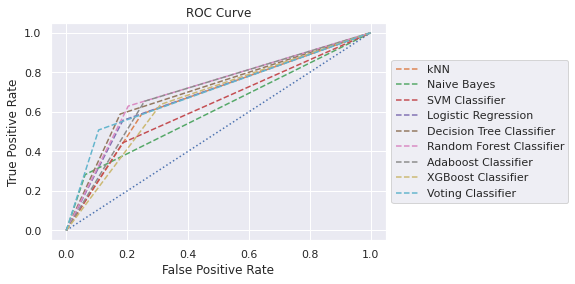

In [91]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(Y_test, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(Y_test, y_pred_NB_balanced)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(Y_test, y_pred_SVM_balanced)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(Y_test, y_pred_LR_balanced)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(Y_test, y_pred_DT_balanced)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(Y_test, y_pred_RF_balanced)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
fpr7, tpr7, thresholds = roc_curve(Y_test, y_pred_Adaboost_balanced)
plt.plot(fpr7, tpr7, '--', label='Adaboost Classifier')
fpr8, tpr8, thresholds = roc_curve(Y_test, y_pred_XGB_balanced)
plt.plot(fpr8, tpr8, '--', label='XGBoost Classifier')
fpr9, tpr9, thresholds = roc_curve(Y_test, y_pred_VC_balanced)
plt.plot(fpr9, tpr9, '--', label='Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

Adaboost Classifier and Random Forest Classifier performs well on this dataset, given that we give importance to minimizing the False positives.

### Precision-Recall Curve

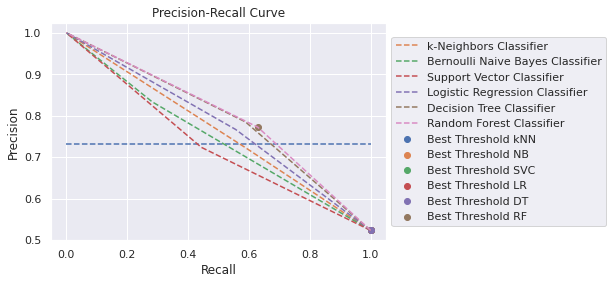

In [92]:
from sklearn.metrics import precision_recall_curve

no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

precision1, recall1, thresholds1 = precision_recall_curve(Y_test, y_pred_kNN_balanced)
plt.plot(recall1, precision1, '--', label='k-Neighbors Classifier')
precision2, recall2, thresholds2 = precision_recall_curve(Y_test, y_pred_NB_balanced)
plt.plot(recall2, precision2, '--', label='Bernoulli Naive Bayes Classifier')
precision3, recall3, thresholds3 = precision_recall_curve(Y_test, y_pred_SVM_balanced)
plt.plot(recall3, precision3, '--', label='Support Vector Classifier')
precision4, recall4, thresholds4 = precision_recall_curve(Y_test, y_pred_LR_balanced)
plt.plot(recall4, precision4, '--', label='Logistic Regression Classifier')
precision5, recall5, thresholds5 = precision_recall_curve(Y_test, y_pred_DT_balanced)
plt.plot(recall5, precision5, '--', label='Decision Tree Classifier')
precision6, recall6, thresholds6 = precision_recall_curve(Y_test, y_pred_RF_balanced)
plt.plot(recall6, precision6, '--', label='Random Forest Classifier')

fscore1 = (2 * precision1 * recall1) / (precision1 + recall1)
fscore2 = (2 * precision2 * recall2) / (precision2 + recall2)
fscore3 = (2 * precision3 * recall3) / (precision3 + recall3)
fscore4 = (2 * precision4 * recall4) / (precision4 + recall4)
fscore5 = (2 * precision5 * recall5) / (precision5 + recall5)
fscore6 = (2 * precision6 * recall6) / (precision6 + recall6)

ix1 = np.argmax(fscore1)
ix2 = np.argmax(fscore2)
ix3 = np.argmax(fscore3)
ix4 = np.argmax(fscore4)
ix5 = np.argmax(fscore5)
ix6 = np.argmax(fscore6)

plt.scatter(recall1[ix1], precision1[ix1], marker='o', label='Best Threshold kNN')
plt.scatter(recall2[ix2], precision2[ix2], marker='o', label='Best Threshold NB')
plt.scatter(recall3[ix3], precision3[ix3], marker='o', label='Best Threshold SVC')
plt.scatter(recall4[ix4], precision4[ix4], marker='o', label='Best Threshold LR')
plt.scatter(recall5[ix5], precision5[ix5], marker='o', label='Best Threshold DT')
plt.scatter(recall6[ix6], precision6[ix6], marker='o', label='Best Threshold RF')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

An interesting Curve here, with Random Forests the only algorithm among the ones implemented to have a Best Threshold above the No-skill line. Random Forest Classifier performs better in this scenario too, albeit not too well.

## Conclusion

Analyzing the ROC Curve, Accuracy and Precision-Recall Curve, it was understood that the Random Forests Classifier performs well in general, in comparison with other popular algorithms. However, the performance metrics are not very appreciable, with the accuracy spiking only upto mid-70%.

It was also noted that the train/test split is the culprit if the accuracy of the test data surpasses the accuracy of the train data.